In [1]:
import pickle
import sys
import numpy as np
from sklearn.cluster import KMeans
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
from get_time_interval_data import *
from PCA import get_cdata
from PCA import get_eigen_vectors
from PCA import project_to_eigen_vectors
from Plot import plot_data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
room_map = mpimg.imread('/home/ardelalegre/SoundMapping/Analysis/Util/room_map.png')
room_map = room_map[200:1000,500:1500]

In [3]:
# extracting aug 19 data from pickle file

data_0819 = pickle.load(open('/home/ardelalegre/CSE4223-ODAS/preprocessing/python/aug 19/exp_08_19_better_data.p', 'rb'))
ind = [18]+[i for i in range(18)]
data_0819=data_0819[:,ind]


# creating eig_vals and eig_vecs from the data
eigen_values_0819, eigen_vectors_0819 = get_eigen_vectors(data_0819)




In [4]:
exp_data = get_time_interval_matrix_data('Oct 29 2020 12:21PM', 'Oct 29 2020 12:25PM')

In [5]:
exp_cdata = get_cdata(exp_data)

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


In [6]:
projected_data_exp = project_to_eigen_vectors(exp_cdata,2, eigen_values_0819, eigen_vectors_0819)


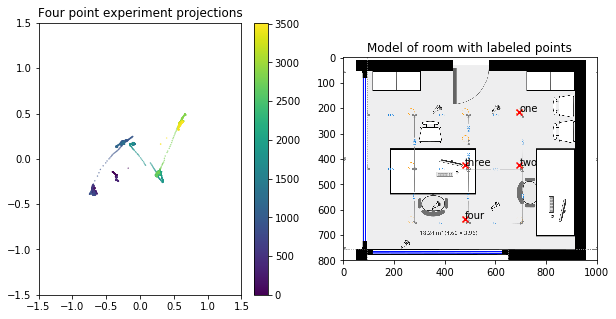

In [7]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
sc = ax1.scatter(projected_data_exp[:,0], projected_data_exp[:,1], c = np.arange(projected_data_exp.shape[0]), s = 0.1)
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
cbar = fig.colorbar(sc)
ax1.set_title('Four point experiment projections')



ax = fig.add_subplot(122)
ax.imshow(room_map)
ax.scatter(695,215, marker = 'x', c = 'r')
ax.scatter(695,425, marker = 'x', c = 'r')
ax.scatter(480,425, marker = 'x', c = 'r')
ax.scatter(480,425+(425-215), marker = 'x', c = 'r')

ax.text(695,215, 'one')
ax.text(695,425, 'two')
ax.text(480,425, 'three')
ax.text(480,425 + (425-215), 'four')

ax.set_title('Model of room with labeled points');

Peter Plots:

NameError: name 'fontsize' is not defined

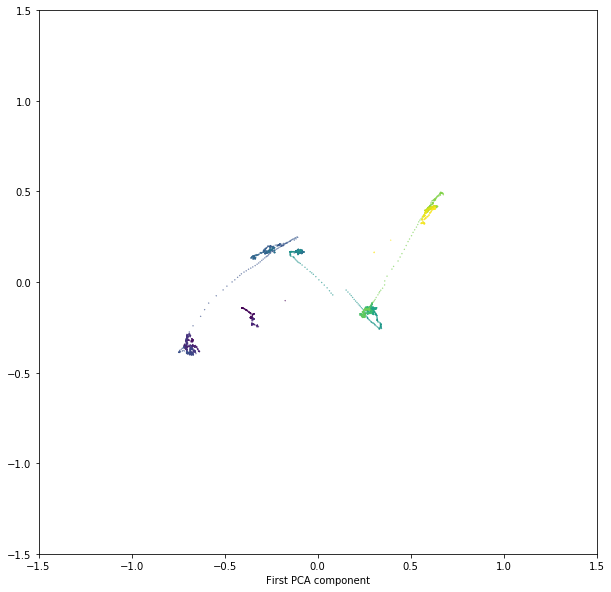

In [21]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
sc = ax1.scatter(projected_data_exp[:,0], projected_data_exp[:,1], c = np.arange(projected_data_exp.shape[0]), s = 0.1)
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,1.5)
# ax1.axis('equal')
ax1.set_xlabel('First PCA component')
ax1.set_ylabel('Second PCA component', fontsize = )

cbar = fig.colorbar(sc)
ax1.set_title('Four point experiment projections',fontsize = 15);

#### Part 2: mapping PCA to room space:

In [8]:
p_0 = [0,0]
p_1 = [1.2,-0.6]
p_2 = [0,-0.6]
p_3 = [-1.2,-0.6]
p_4 = [1.2,0.6]
p_5 = [0,0.6]
p_6 = [-1.2,0.6]
p_7 = [1.2,1.8]
p_8 = [0,1.8]
p_9 = [-1.2,1.8]

list_phys_all_pt_coords = [p_0, p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9]
phys_all_pt_coords = np.asarray(list_phys_all_pt_coords)
# print(phys_all_pt_coords)

We need to find the means of the minute data.
We need to extract minute by minute data.
Since this experiment was for 4 minutes, we will extract 4 minutes of data.